<h1>Exit survey analysis from DETE and TAFE</h1>

<h3>Step 1 - Importing and understanding the data</h3>

<p>
This project aims to identify the cause of employees resigning from the Department of Education, Training ad Employment (DETE) and the Technical and Further Education (TAFE) institute using their exit surveys. We want to identify the type of dissatisfaction the employees experienced as well as the correlation of these dissastifaction with the employee's seniority.
</p>

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print("DETE survey dataframe info".upper())
print(dete_survey.info())
print("")
print("DETE survey dataframe 5 first rows".upper())
print(dete_survey.head())
print("")
print("TAFE survey dataframe info".upper())
print(tafe_survey.info())
print("")
print("TAFE survey dataframe 5 first rows".upper())
print(tafe_survey.head())

DETE SURVEY DATAFRAME INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null

We can see that there are a lot of imformation in both data sets. The DETE survey has 822 entries with 56 columns each. The TAFE survey has 702 entries with 72 columns. The columns can be separated in mainly two categories such as factors (informations about the employees) and answers to the survey. Now, we'll take a quick look at the missing data.

In [2]:
print("Missing values for each column in the DETE survey")
print(dete_survey.isnull().sum())
print("Missing values for each column in the TAFE survey")
print(tafe_survey.isnull().sum())

Missing values for each column in the DETE survey
ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Stud

Each data set has many missing values. We'll have to understand the meaning od these missing values and elaborate a strategy to tackle them. The DETE survey has has few missing values in quesitons about the motives for leaving but has a lot of missing data about the information on the employees. The TAFE survey has a relatively constant number of missing values throughout the columns of the dataset so we might explore if some entries (rows) do not contain any information and delete them.

<h3>Step 2 - Cleaning missing values and droping useless data</h3>

The DETE survey dataframe contains "Not Stated" values which can be considered as null values. We'll read the csv file again this time automatically changing these values for NaN.

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
print(dete_survey.head())
print("ALL COLUMNS FROM THE DETE DATA SET")
print(dete_survey.columns.values)

   ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

We'll delete all the column that are useless (the ones with A/N answer).

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
print("ALL COLUMNS FROM THE UPDATED DETE DATA SET")
print(dete_survey_updated.columns.values)

ALL COLUMNS FROM THE UPDATED DETE DATA SET
['ID' 'SeparationType' 'Cease Date' 'DETE Start Date' 'Role Start Date'
 'Position' 'Classification' 'Region' 'Business Unit' 'Employment Status'
 'Career move to public sector' 'Career move to private sector'
 'Interpersonal conflicts' 'Job dissatisfaction'
 'Dissatisfaction with the department' 'Physical work environment'
 'Lack of recognition' 'Lack of job security' 'Work location'
 'Employment conditions' 'Maternity/family' 'Relocation' 'Study/Travel'
 'Ill Health' 'Traumatic incident' 'Work life balance' 'Workload'
 'None of the above' 'Gender' 'Age' 'Aboriginal' 'Torres Strait'
 'South Sea' 'Disability' 'NESB']


We'll do the columns drop with the TAFE data as well.

In [5]:
print("ALL COLUMNS FROM THE TAFE DATA SET")
print(tafe_survey.columns.values)

ALL COLUMNS FROM THE TAFE DATA SET
['Record ID' 'Institute' 'WorkArea' 'CESSATION YEAR'
 'Reason for ceasing employment'
 'Contributing Factors. Career Move - Public Sector '
 'Contributing Factors. Career Move - Private Sector '
 'Contributing Factors. Career Move - Self-employment'
 'Contributing Factors. Ill Health'
 'Contributing Factors. Maternity/Family'
 'Contributing Factors. Dissatisfaction'
 'Contributing Factors. Job Dissatisfaction'
 'Contributing Factors. Interpersonal Conflict'
 'Contributing Factors. Study' 'Contributing Factors. Travel'
 'Contributing Factors. Other' 'Contributing Factors. NONE'
 'Main Factor. Which of these was the main factor for leaving?'
 'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction'
 'InstituteViews. Topic:2. I was given access to skills training to help me do my job better'
 'InstituteViews. Topic:3. I was given adequate opportunities for personal development'
 'InstituteViews. Topic:4. I was given adequa

We'll remove the columns that aren't contribution factors.

In [6]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print("ALL COLUMNS FROM THE UPDATED TAFE DATA SET")
print(tafe_survey_updated.columns.values)

ALL COLUMNS FROM THE UPDATED TAFE DATA SET
['Record ID' 'Institute' 'WorkArea' 'CESSATION YEAR'
 'Reason for ceasing employment'
 'Contributing Factors. Career Move - Public Sector '
 'Contributing Factors. Career Move - Private Sector '
 'Contributing Factors. Career Move - Self-employment'
 'Contributing Factors. Ill Health'
 'Contributing Factors. Maternity/Family'
 'Contributing Factors. Dissatisfaction'
 'Contributing Factors. Job Dissatisfaction'
 'Contributing Factors. Interpersonal Conflict'
 'Contributing Factors. Study' 'Contributing Factors. Travel'
 'Contributing Factors. Other' 'Contributing Factors. NONE'
 'Gender. What is your Gender?' 'CurrentAge. Current Age'
 'Employment Type. Employment Type' 'Classification. Classification'
 'LengthofServiceOverall. Overall Length of Service at Institute (in years)'
 'LengthofServiceCurrent. Length of Service at current workplace (in years)']


<h3>Step 3 - Normalise column names</h3>

We'll now normalise column names so we can merge and compare both dataframes later on.

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(" ", "_").str.strip(" ")
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [8]:
tafe_column_rename = {'Record ID':'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
                     'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
                      'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
                      'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                      'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns=tafe_column_rename)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


Now the columns we changed should be the same in both dataframes.

In [9]:
print(dete_survey_updated.head())
print(tafe_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

<h3>Step 4 - Drop non resignation data</h3>

We want to identify motives of resignation so we'll get rid of the the entries where the employee has not resigned.

In [10]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [11]:
dete_resignations = dete_survey_updated.copy()
dete_resignations = dete_resignations.loc[dete_resignations['separationtype'].isin(['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate'])]
print(dete_resignations['separationtype'].value_counts())
tafe_resignations = tafe_survey_updated.copy()
tafe_resignations = tafe_resignations.loc[tafe_resignations['separationtype'] == 'Resignation']
print(tafe_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64
Resignation    340
Name: separationtype, dtype: int64


<h3>Step 5 - Uniformizing date data and remove inconsistent data</h3>

We'll take a look at the cease_date and date_start_dete columns to only keep the value of the year and remove data that would'nt make sense.

In [12]:
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64


In [13]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([2][0-9]{3})")
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
print(dete_resignations['cease_date'].value_counts())
print(dete_resignations.head())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
    id                        separationtype  cease_date  dete_start_date  \
3    4             Resignation-Other reasons      2012.0           2005.0   
5    6             Resignation-Other reasons      2012.0           1994.0   
8    9             Resignation-Other reasons      2012.0           2009.0   
9   10            Resignation-Other employer      2012.0           1997.0   
11  12  Resignation-Move overseas/interstate      2012.0           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Sec

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [14]:
print(dete_resignations['dete_start_date'].value_counts())
print(tafe_resignations['cease_date'].value_counts())

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


The date values now seem to be uniformized and coherent.

<h3>Step 6 - Creating an institute_service column in the DETE dataframe</h3>

Since we want to analyze the causes of resignation in correlation with the time the employees spent in the workplace, we want to create a new column with that data in the DETE datafram where it is not found acutally.

In [15]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
print(dete_resignations['institute_service'].value_counts())

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64


<h3>Step 7 - Identifying employees who risigned because of dissactisfaction</h3>

We'll work with the data to identify employees who were dissatisfied. In the TAFE data, the two columns 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' are associated with dissatisfication.

In [16]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [17]:
def update_vals(val):
    if(pd.isnull(val)):
        return np.nan
    elif(val == '-'):
        return False
    else:
        return True

tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
print(tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].head(110))

    Contributing Factors. Dissatisfaction  \
3                                   False   
4                                   False   
5                                   False   
6                                   False   
7                                   False   
8                                   False   
9                                   False   
10                                  False   
13                                  False   
14                                   True   
15                                  False   
16                                    NaN   
17                                  False   
18                                    NaN   
19                                  False   
20                                   True   
21                                  False   
22                                  False   
23                                  False   
24                                  False   
26                                   True   
27        

In [18]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1)
print(tafe_resignations['dissatisfied'].head(20))

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20     True
21    False
22    False
23    False
24    False
Name: dissatisfied, dtype: bool


In [19]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1)
print(dete_resignations['dissatisfied'].head(20))

3     False
5      True
8     False
9      True
11    False
12    False
14     True
16     True
20    False
21    False
22     True
23     True
25     True
27    False
33     True
34     True
37    False
39     True
40    False
41     True
Name: dissatisfied, dtype: bool


We've now identified employees who resigned because of some sort of insatisfaction.

<h3>Step 8 - Combining the two data sets</h3>

We'll now combine the two data sets to perfom our analysis on the cause of resignation in correlation with the time of service.

First, we'll add a column to identify the institute to which the employee is attached before merging the data sets.

In [20]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

In [21]:
combined = pd.concat([dete_resignations, tafe_resignations], axis = 0)
print(combined.shape)
print(combined.head())

(651, 53)
   Contributing Factors. Career Move - Private Sector   \
3                                                 NaN    
5                                                 NaN    
8                                                 NaN    
9                                                 NaN    
11                                                NaN    

   Contributing Factors. Career Move - Public Sector   \
3                                                 NaN   
5                                                 NaN   
8                                                 NaN   
9                                                 NaN   
11                                                NaN   

   Contributing Factors. Career Move - Self-employment  \
3                                                 NaN    
5                                                 NaN    
8                                                 NaN    
9                                                 NaN    
11      

In [22]:
combined_updated = combined.dropna(axis = 1, thresh=500)
print(combined_updated.shape)
print(combined_updated.head())

(651, 10)
      age  cease_date  dissatisfied    employment_status  gender    id  \
3   36-40      2012.0         False  Permanent Full-time  Female   4.0   
5   41-45      2012.0          True  Permanent Full-time  Female   6.0   
8   31-35      2012.0         False  Permanent Full-time  Female   9.0   
9   46-50      2012.0          True  Permanent Part-time  Female  10.0   
11  31-35      2012.0         False  Permanent Full-time    Male  12.0   

   institute institute_service          position  \
3       DETE                 7           Teacher   
5       DETE                18  Guidance Officer   
8       DETE                 3           Teacher   
9       DETE                15      Teacher Aide   
11      DETE                 3           Teacher   

                          separationtype  
3              Resignation-Other reasons  
5              Resignation-Other reasons  
8              Resignation-Other reasons  
9             Resignation-Other employer  
11  Resignation-M

We've now combined the two tables vertically and kept only the columns that were common to the two individual data sets.

<h3>Step 9 - Cleaning of the institute_service column</h3>

In the last step before our analysis, we need to uniformize the data from the institute_service column and the seperate it into categories. We chose: New (0-3 years), Experienced (3-6 years), Established (7-10 years), Veteran (11+ years).

In [23]:
print(combined_updated['institute_service'].value_counts())


Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [24]:
def extract_year(string):
    string = string.split(' ')
    if(len(string) > 1):
        string = string[2]
        return string
    string = string[0].split('.')
    if(len(string) > 1):
        string = string[0]
        return string
    string = string[0].split('-')
    if(len(string) > 1):
        string = string[0]
        return string

institute_service_clean = combined_updated['institute_service'].astype('str').apply(extract_year)
combined_updated['institute_service'] = institute_service_clean.astype('float')
print(combined_updated['institute_service'].value_counts())

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
def assign_category(exp_years):
    if(pd.isnull(exp_years)):
        return "Unknown"
    elif(exp_years < 3):
        return "New"
    elif(3 <= exp_years <= 6):
        return "Experienced"
    elif(7 <= exp_years <= 10):
        return "Established"
    else:
        return "Veteran"
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(assign_category)
print(combined_updated['service_cat'].value_counts())

New            193
Experienced    172
Veteran        136
Unknown         88
Established     62
Name: service_cat, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We've now cleaned the institue_service column data and created a knew column service_cat in which we assignated a category to classify the experience of the employees had in the company. We're now ready to perform our analysis.

<h3>Step 10 - Analysis of the dissatified employees data</h3>

Now we're ready to perform our analysis. We'll look at the proportion of dissatisfied employees in relation to the category of service time we've assigned them.

In [29]:
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    411
True     240
Name: dissatisfied, dtype: int64


In [42]:
results = combined_updated.pivot_table(index=['service_cat'], values=['dissatisfied'])
print(results)

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Unknown          0.295455
Veteran          0.485294


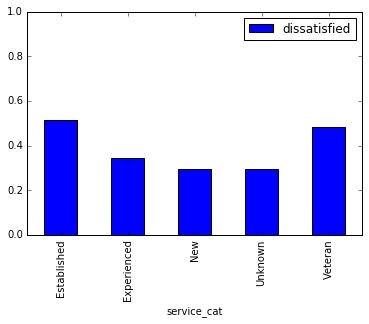

In [47]:
%matplotlib inline
results.plot(kind='bar', ylim=[0, 1])

We can conclude that older employees resigned in higher proportion due to some sort of instisfaction. 